<a id="import"></a>
# <p style="background:#ffb79f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:100%; padding:30px">Classification</p>

### <p style="background-color:#a4b5c6; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:95%; padding:30px; line-height:165%;font-weight:  lighter">A very important point that we must pay attention to is that this exercise has two separate datasets, so we must perform the evaluation and training tasks on the first dataset and consider the test dataset only as unseen data.</p>

### For creating an AI model,we should follow these phases:
#### A)Preparing the data
#### B)Preprocessing the data
#### C)Learning the model & Evaluating the results
#### D) Predictting real values

In [7]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

# for visuallization
import plotly.express as px

In [8]:
%notebook matplotlib
from warnings import filterwarnings
filterwarnings('ignore')

<a id="import"></a>
# <p style="background:#2ab79f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase A: Preparing the data</p>

In [9]:
train=pd.read_csv('./archive/train.csv')
test=pd.read_csv('./archive/test.csv')

In [10]:
train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

### Features:

* __Battery_Power__: Total energy a battery can store in one time measured in mAh
* __Blu__ : Has bluetooth or not
* __Clock_speed__ : speed at which microprocessor executes instructions
* __dual_sim__ : Has dual sim support or not
* __fc__ : Front camera mega pixels
* __four_g__ : Has 4G or not
* __int_memory__ : Internal memory in gigabytes
* __m_dep__ : Mobile depth in cm
* __mobile_wt__ : Weight of mobile phone
* __n_cores__ : Number of cores of processor
* __pc__ : Primary camera mega pixels
* __px_height__ : Pixel resolution height
* __px_width__ : Pixel resolution width
* __ram__ : Random Access Memory in mega bytes
* __Sc_h__: Screen height of mobile in cm
* __Sc_w__ : Screen width of mobile in cm
* __talk_time__ : longest time that a single battery change will last when you are 
* __three_g__ : Has 3G or not
* __touch_screen__ : Has touch screen or not
* __wifi__ : Has wifi or not
* __Price_range__ : This is target variable with value of 0 (low cost),1(medium cost),2(high cost),3(very high cost)

<a id="import"></a>
## <p style="background:#2ab7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:50%; padding:30px">Step 1: Data Information</p>

In [11]:
print('trian_shape:',train.shape)
print('test_shape',test.shape)

trian_shape: (2000, 21)
test_shape (1000, 21)


In [12]:
train.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_wid

In [13]:
test.info

<bound method DataFrame.info of        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35

In [14]:
train.describe(include='all')

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [15]:
test.describe(include='all')

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

<a id="import"></a>
## <p style="background:#2ab7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:50%; padding:30px">Step 2: Feature Charactristics </p>

###### I devide the features into the numerical and categorical

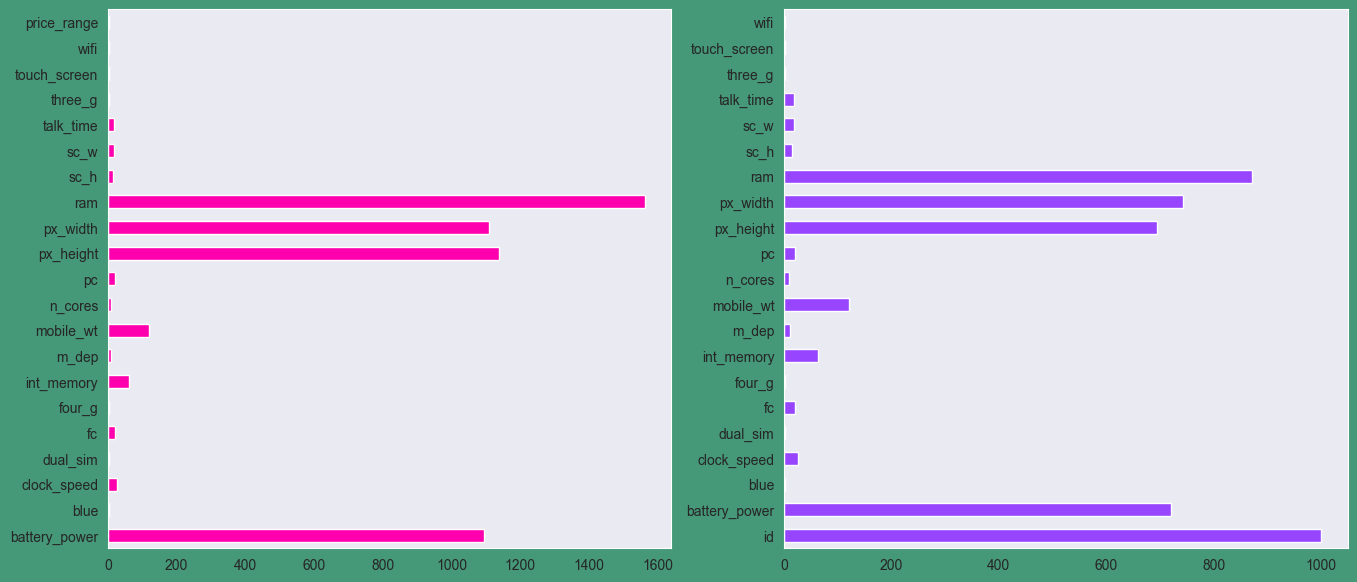

In [16]:
sns.set_style('darkgrid')
color = 'royalblue'

fig, ax = plt.subplots(1, 2, figsize=(16,7),dpi=100,facecolor='#459878')
train.nunique().plot(kind='barh',color='#ff00ae',ax=ax[0],label='train')
ax[0].grid()
test.nunique().plot(kind='barh',color='#9845ff',ax=ax[1],label='test')
ax[1].grid()

###### 1- According to the graphs above, the first thing we see is that the number of ID column values is equal to the total number of test dataset samples, so this column is not suitable for our model. So we should remove it from out dataset

###### 2-  Another point that can be understood from the above diagram is whether the columns are continuous or categorical. If the number of unique data in each column is very high, it can be considered a continuous variable, and if it is the opposite, we consider that column to be categorical.

In [17]:
test.drop('id',inplace=True,axis=1)

###### 3- And another point, according to what was said at the beginning of this notebook, is that it is better that the change interval of the unseen data is the same as the change interval of the train dataset, which can be obtained both from the above chart and from the following charts.

In [18]:
train_without_target=train.drop('price_range',axis=1)

<a id="import"></a>
## <p style="background:#2ab7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:50%; padding:30px">Step 3: Visuallization </p>

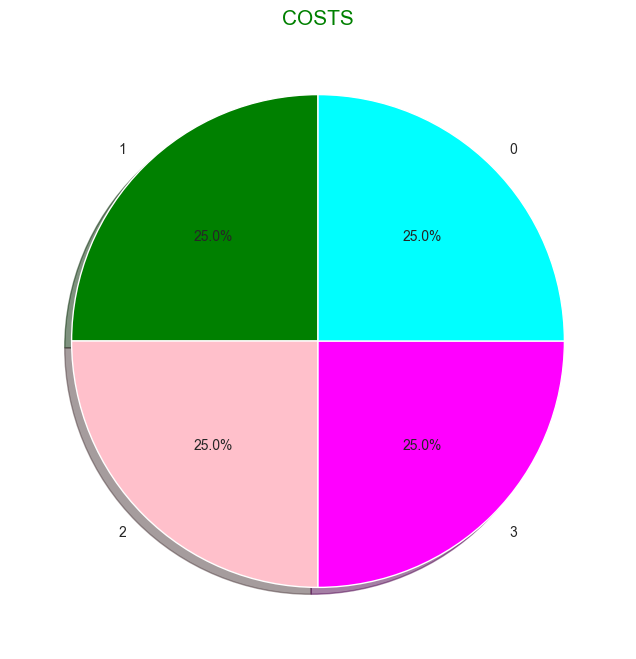

In [19]:
labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

### We see that our target is *Balanced*. So we can use *Accuracy* metric for evaluationg 

#### We have a balanced target.

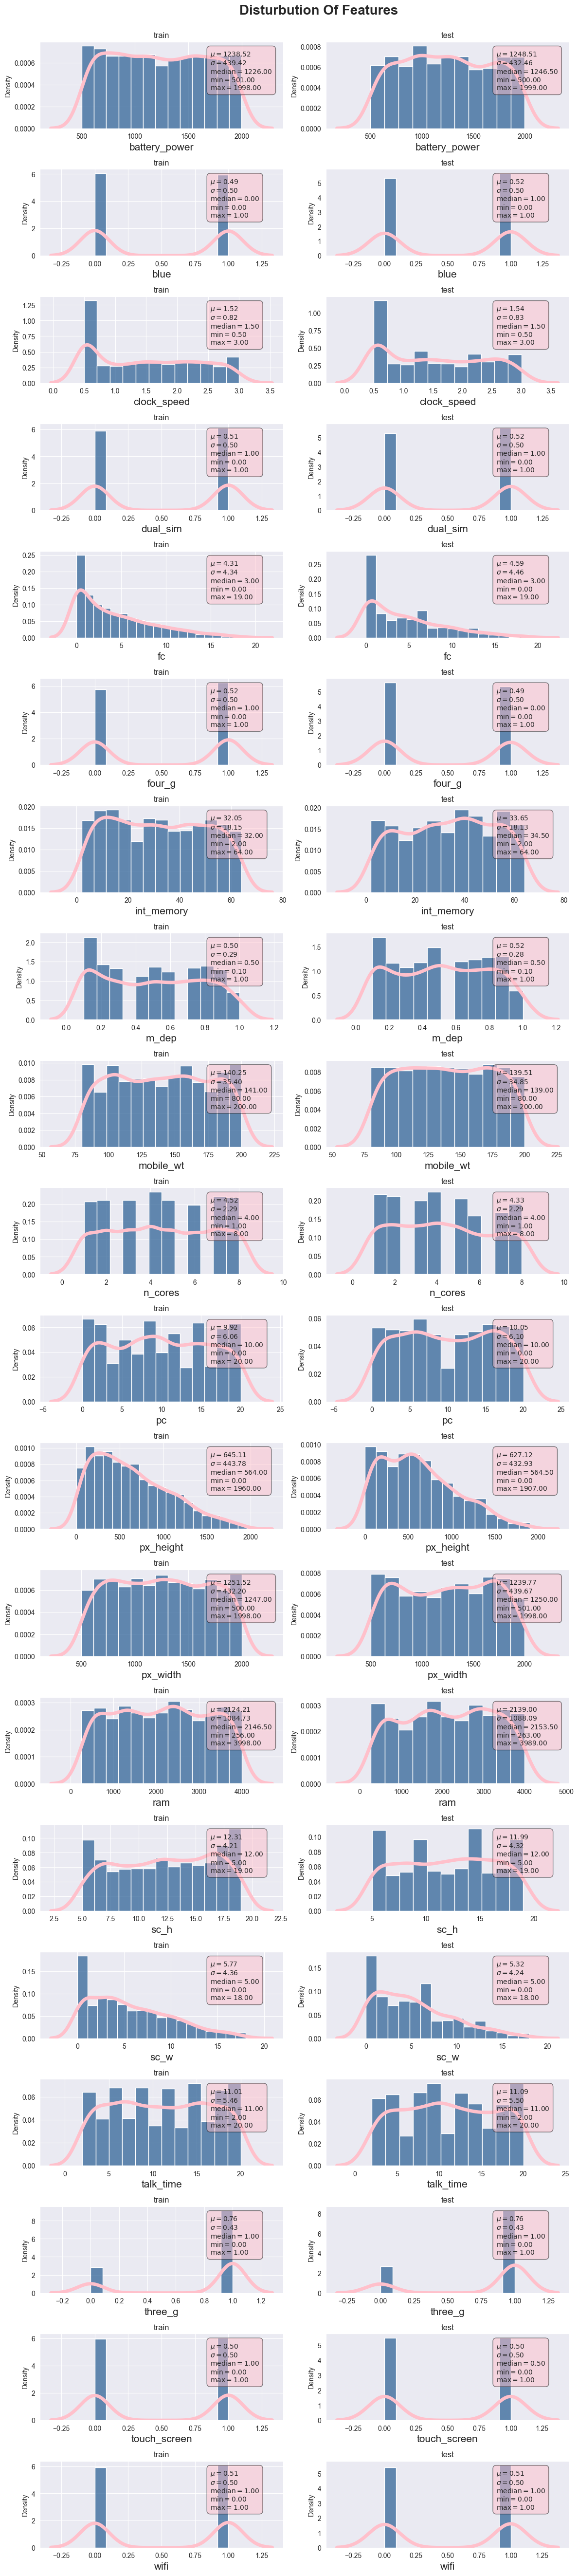

In [20]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(train_without_target.columns.values)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = train_without_target, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = train_without_target, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %train_without_target[col].mean(),
    r'$\sigma=%.2f$' %train_without_target[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(train_without_target[col]),
    r'$\mathrm{min}=%.2f$' %train_without_target[col].min(),
    r'$\mathrm{max}=%.2f$' %train_without_target[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = test, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = test, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %test[col].mean(),
    r'$\sigma=%.2f$' %test[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(test[col]),
    r'$\mathrm{min}=%.2f$' %test[col].min(),
    r'$\mathrm{max}=%.2f$' %test[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
   
    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,
    fontweight = "bold")
plt.tight_layout()
plt.show()

#### We checked each feature distribution in both datasets and came to the conclusion that:
* __The distribution of features in both datasets can be considered similar despite having differences
* __The division of continuous and categorical columns can also be done easily

In [21]:
num_columns=['battery_power','clock_speed', 'fc', 'int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
cat_columns=['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']

<a id="import"></a>
## <p style="background:#86f7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:30%; padding:30px">Step 3-1: EDA For Categorical Features</p>

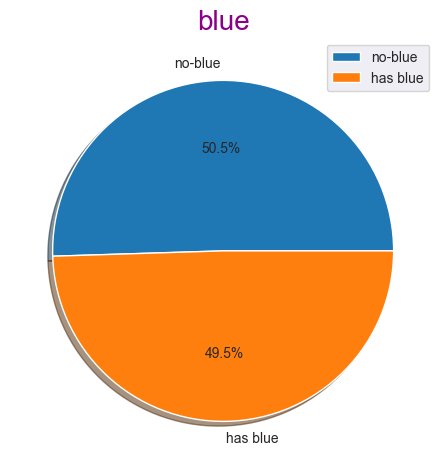

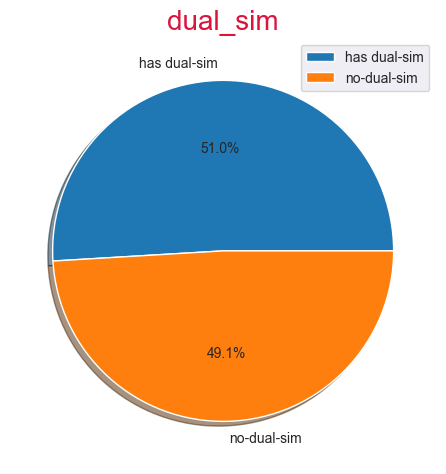

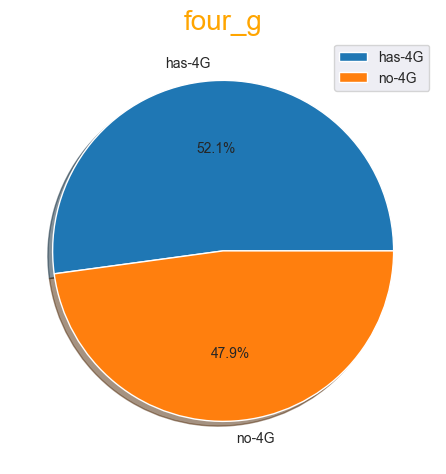

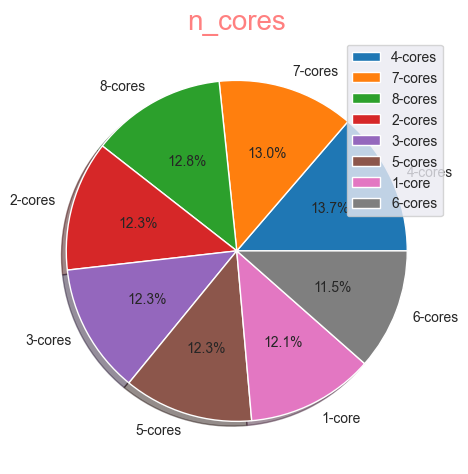

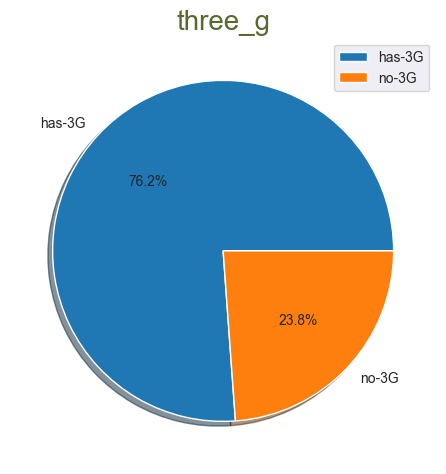

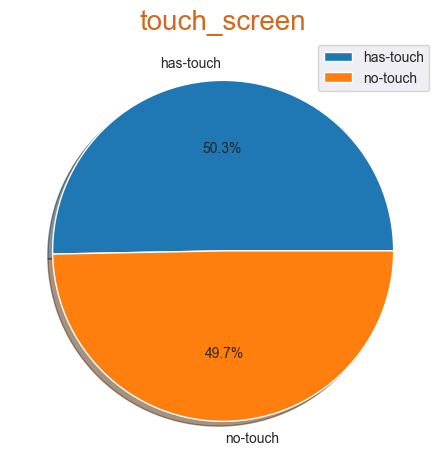

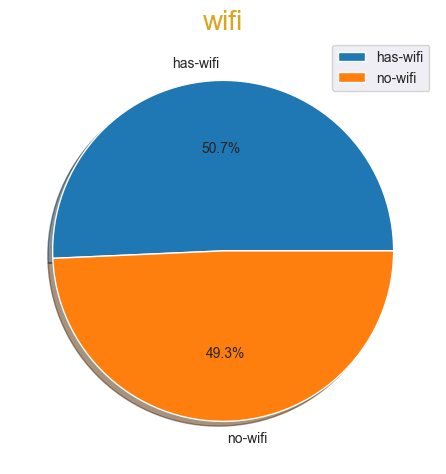

In [22]:

colors_cat=['#8B008B','#DC143C','#FFA500','#ff8080','#556B2F','#D2691E','#DAA520']
new_train=train.replace(to_replace={'blue':[0,1],'dual_sim':[0,1],'four_g':[0,1],
                      'n_cores':[1,2,3,4,5,6,7,8],'three_g':[0,1],'touch_screen':[0,1],'wifi':[0,1]},
           value={'blue':['no-blue','has blue'],
                  'dual_sim':['no-dual-sim','has dual-sim'],
                 'four_g':['no-4G','has-4G'],
                 'n_cores':['1-core','2-cores','3-cores','4-cores','5-cores','6-cores','7-cores','8-cores'],
                 'three_g':['no-3G','has-3G'],
                 'touch_screen':['no-touch','has-touch'],
                 'wifi':['no-wifi','has-wifi']})
for i,c in enumerate(cat_columns):
    plt.figure(figsize =(5.5, 6.5))
    plt.pie(new_train[c].value_counts() ,labels=list(new_train[c].value_counts().index),shadow = True,autopct='%1.1f%%')
    plt.legend()
    plt.title(c,color=colors_cat[i],fontsize=20)

#### These features are in both *train* and *test* dataset
* __The number of phones that use Bluetooth is very close to the number of phone whom do not use it
* __Also, the number of phones with two SIM cards is very close to the number of single SIM phones
* __The number of phones with 4G is slightly more than the number of phones without 4G
* __The number of phones with different types of number of cores have an almost equal distribution
* __The number of touch screen and Wi-Fi have the same distribution as above
* __But The number of phones that use 3G is much more than the number of phones that do not use it

<a id="import"></a>
## <p style="background:#86f7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:30%; padding:30px">Step 3-2: EDA For Numerical Features</p>

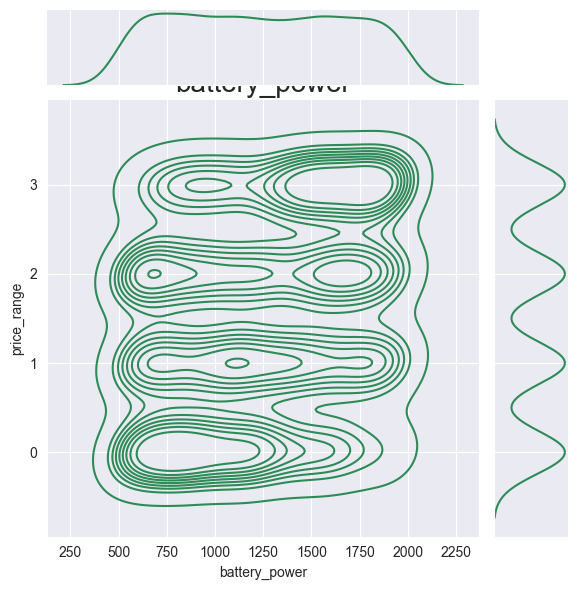

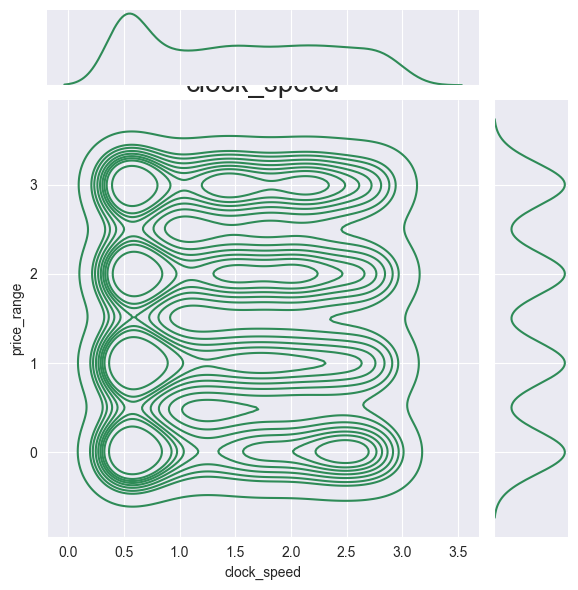

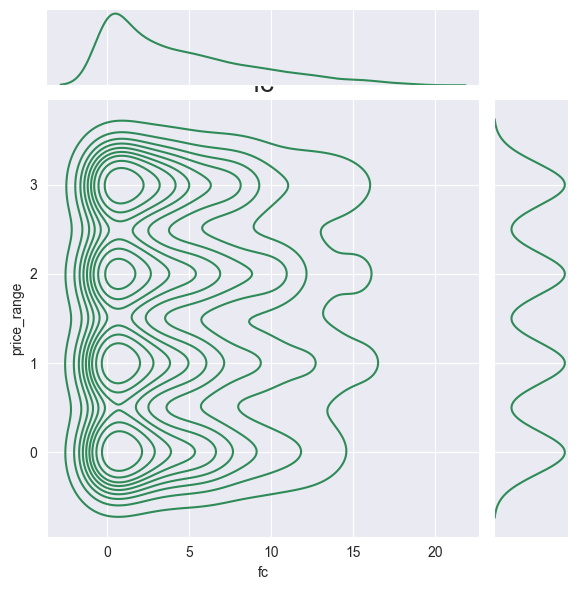

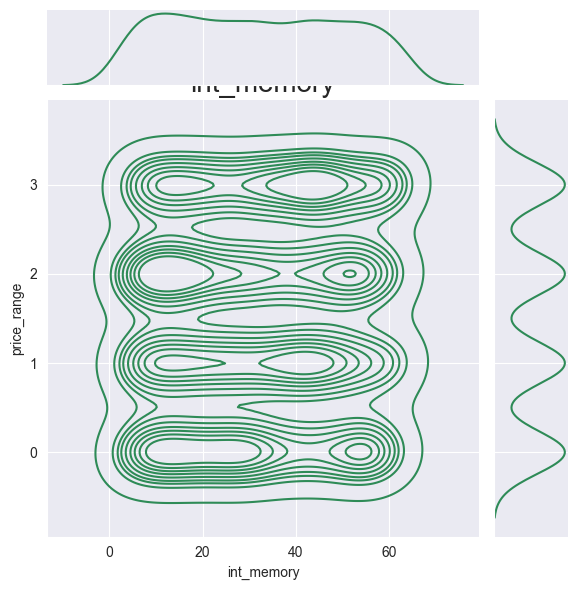

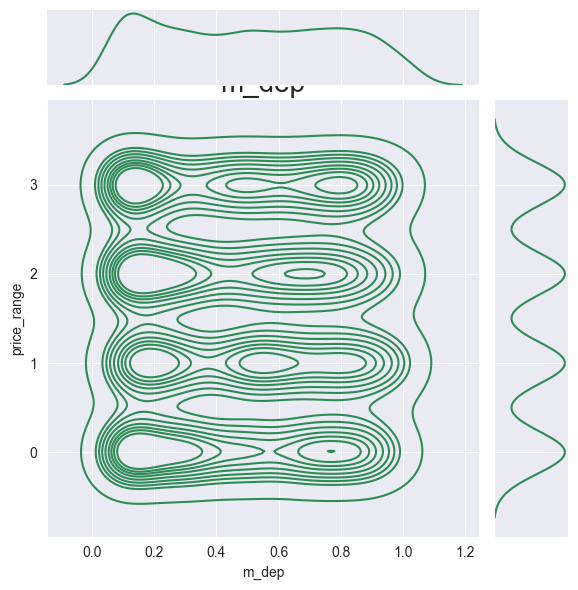

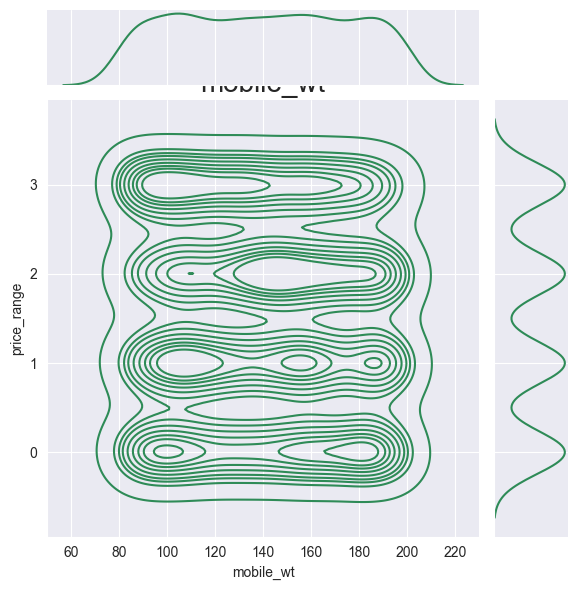

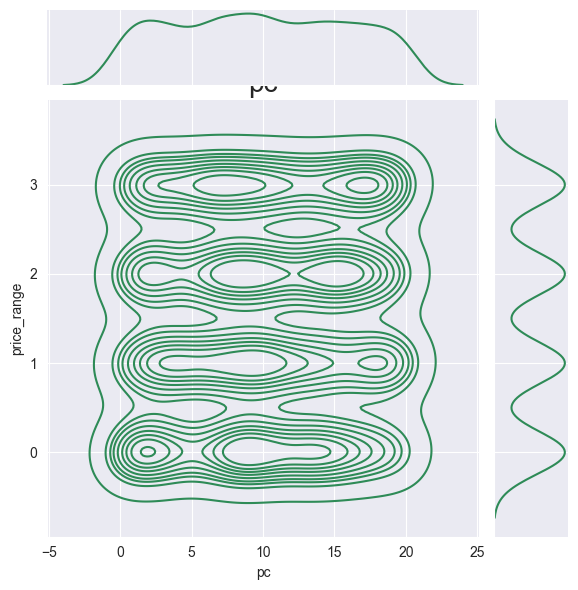

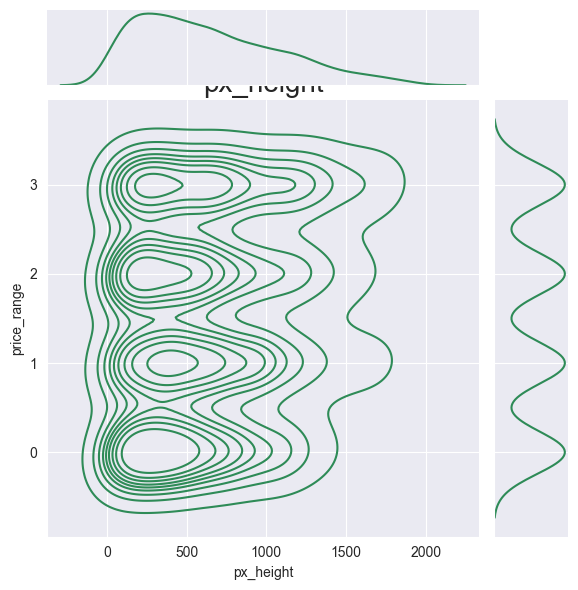

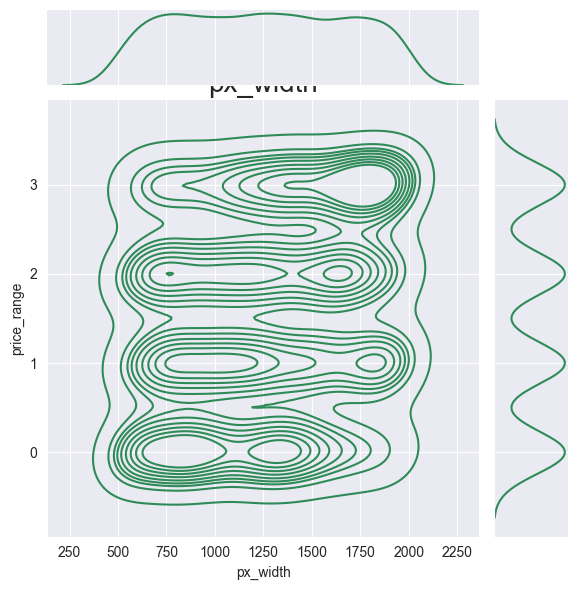

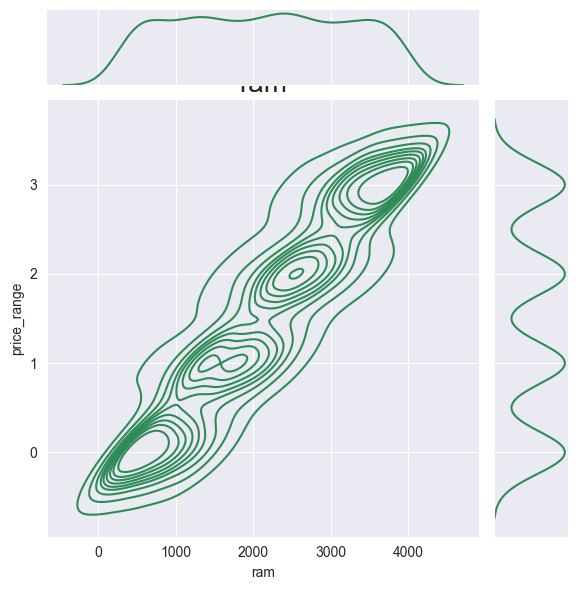

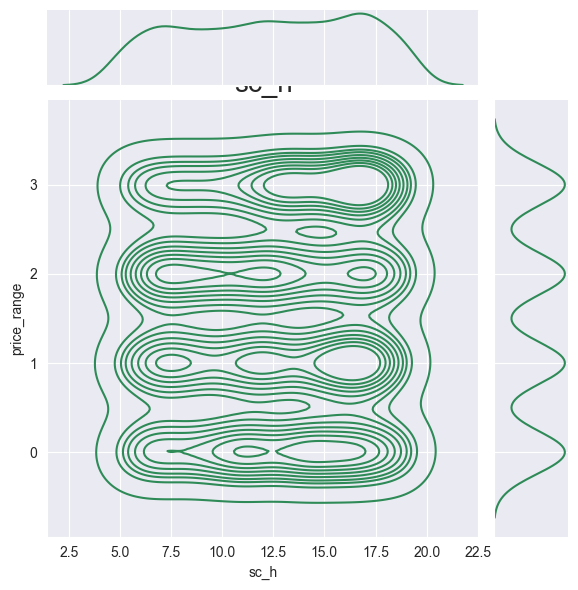

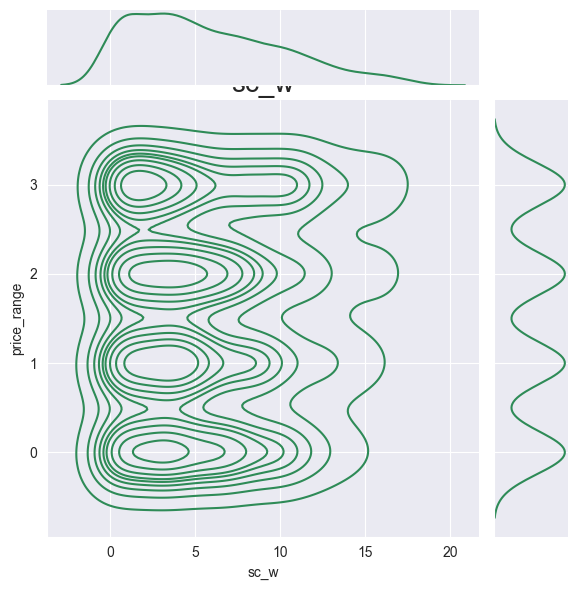

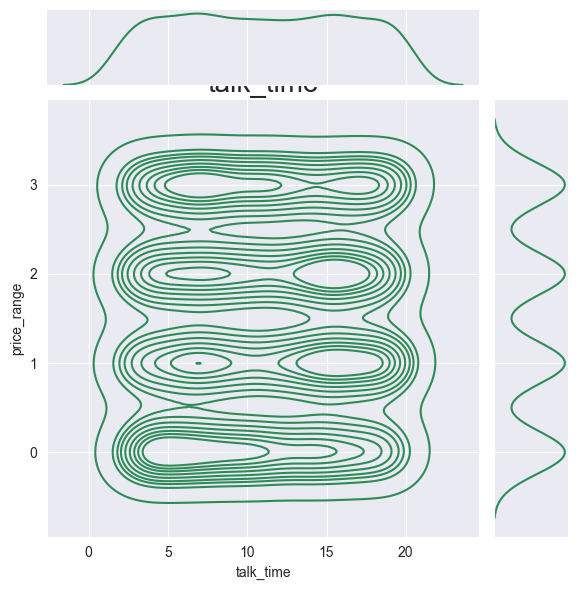

In [23]:
for i,c in enumerate(num_columns):
    sns.jointplot(x=c ,y='price_range',data=train,kind='kde',palette = "dict",color='seagreen')
    plt.xlabel(c)
    plt.ylabel('price_range')
    plt.title(c,fontsize=20)

* __battery_power: The high concentration of phones in the class zero range, below 1500 mAh is evident, And as for the more expensive phones, their battery power is above 1500 mAh, it was the same as we expected.

* __clock_speed: There is a concentration below 1.0 GHz for all groups, However, in all 4 categories, bipolars can also be seen.

* __fc: The same bipolars that we mentioned above are not visible in the case of the front camera

* __int_memory: For class 3 phones, which are also the most expensive, there is a lot of concentration for values above 35 GB for internal memory. On the other hand, cheaper phones usually have lower values for internal memory

* __m_dep: Usually, cheaper phones have less depth and more expensive phones have higher depth

* __mobile_wt: More expensive phones weigh less, but phones in class 2 weigh more. But class 2 have big concentration in higher than 120gr.

* __pc: Class 1 phones have a primary camera less than 15 mega pixels, but class zero phones usually have a higher primary camera. (According to this data set, we obtained this information, it may not be the case in reality)

* __px_height: In all groups the number of phones that have less than 600 pixel in height are more.

* __px_width: In expensive phones, the number of pixels in the width of the phone is higher than 1000 pixels, but in class 1 and 2 phones, this amount is less than 1000 pixels.

* __ram: In general, the more expensive phone has higher ram.

* __sc_h: The height of most class 3 phones is higher than 12 cm, but this feature is not very evident in other classes

* __sc_w: It can be said that unlike the above feature, the width of more expensive phones is less




<a id="import"></a>
# <p style="background:#2ab79f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase B: Preprocessing the data</p>

##### At this stage, we must check the data from all aspects to decide if there are noise data or outliers in the columns.

<a id="import"></a>
## <p style="background:#2ab7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:50%; padding:30px">Step 1: Missing values & Duplicates</p>

In [24]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [25]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

##### We dont have nay *NaN*s  in both datasets

In [26]:
train.drop_duplicates(inplace=True)
train.shape

(2000, 21)

In [27]:
test.drop_duplicates(inplace=True)
test.shape

(1000, 20)

##### We dont have nay *Duplicates*s in both datasets

<a id="import"></a>
## <p style="background:#2ab7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:50%; padding:30px">Step 2: Noise & Outliers</p>

#### Noies Detection:

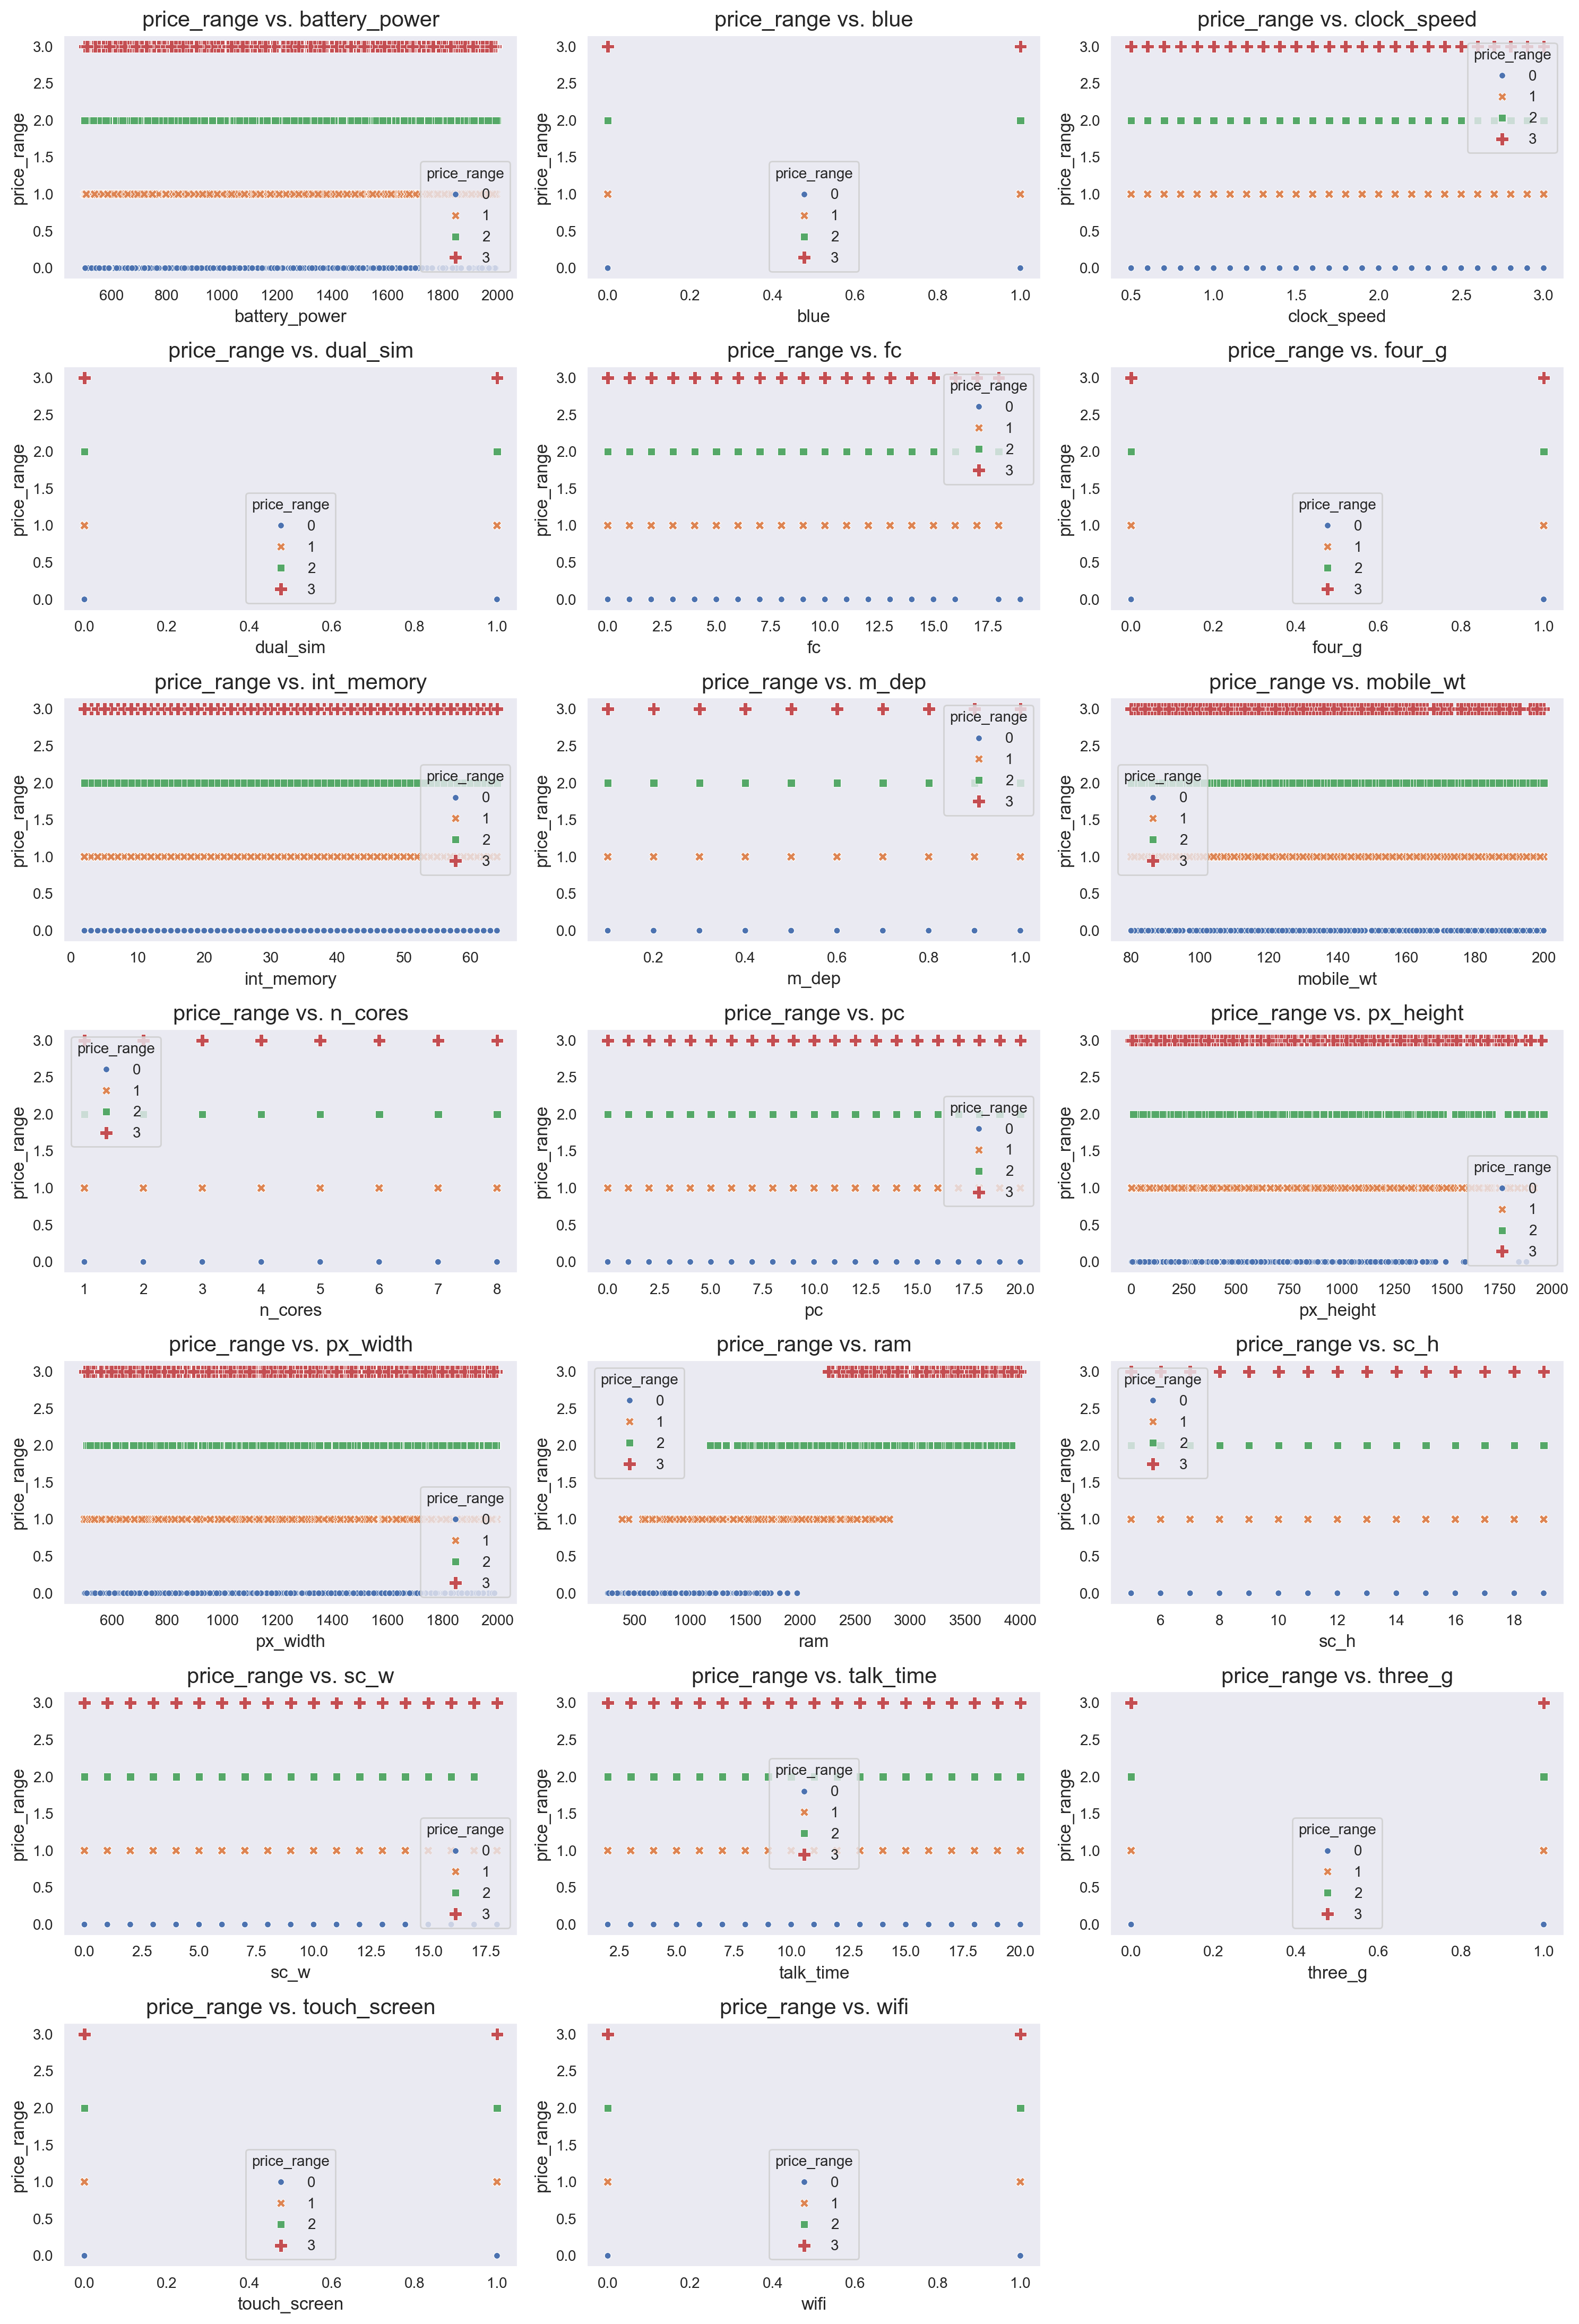

In [28]:
target = 'price_range'
features = train.columns.drop(target)
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=7 ,ncols=3, figsize=(15,22), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=train, x=features[i], y=target,hue=target, ax=ax[x,y],style=target,palette="deep",size=target)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[6, 2].axis('off')

plt.tight_layout()
plt.show()

### Noise:
#### Features Description:

##### 1-px_width and px_height:
We know that Screen size refers to the physical dimensions of a device’s display, measured in inches or centimeters. Screen resolution, on the other hand, refers to the number of pixels displayed on a screen, measured in pixels per inch (PPI) or pixels per centimeter (PPCM).

To calculate the pixels per inch (PPI) of a specific device, you’ll need to know the resolution of the device’s screen (measured in pixels) and the physical size of the screen (measured in inches). Once you have that, you can use the following formula to calculate PPI:

PPI = (resolution in pixels) / (screen size in inches)

According to the latest Compatibility Definition Document, the definition for screen configurations require that:

* __Screens MUST be at least 2.5 inches in physical diagonal size
* __Density MUST be at least 100 dpi
* __The aspect ratio MUST be between 1.333 (4:3) and 1.779 (16:9)
* __The display technology used consists of square pixels
* __In practical terms, the lowest screen resolution currently being used is QVGA (240x320). There are a couple of phones that use this resolution including the HTC Tattoo and Wildfire. The smallest device I'm aware of is the 2.55" QVGA
* __px_h:320
* __px_w: 240
(It is usually quoted as width × height, with the units in pixels: for example, 1024 × 768 means the width is 1024 pixels and the height is 768 pixels)

#### Here,we give you one of the smallest mobile in the world:
* __ **Modu phone**:

Dimensions - 75 x 46.5 x 11mm
Memory - removable microSDHC support (2GB, max. 32GB)
Screen - 2.2” resistive touch screen
3G network - HSDPA 3.6Mbps 900/1900/2100 MHz
240 x 320 pixels resolution (QVGA)

##### Untill here, we found that the minimum value for *px_heigth* is 320 and  for *px_width* is 240. But I found one webpage that introduce some of
##### the small mobile that the smallest value for *px_height* is 217 and for *px_width* is 220
##### This site: https://ineedlearn.wordpress.com/2020/12/26/width-height-and-dpr-of-cell-phones

In [29]:
#1-
print('train******************************')
print('px_height: ',len(train[(train['px_height']<217)]))
print('px_width: ',len(train[(train['px_width']<220)]))
print('test******************************')
print('px_height: ',len(test[(test['px_height']<217)]))
print('px_width: ',len(test[(test['px_width']<220)]))



train******************************
px_height:  386
px_width:  0
test******************************
px_height:  211
px_width:  0


##### We wanna replace *px_height* with the minimum value (217)

In [30]:
train['px_height'].replace(train['px_height'][(train['px_height']<217)].values,217,inplace=True)
test['px_height'].replace(test['px_height'][(test['px_height']<217)].values,217,inplace=True)

##### 2-sc-h and sc-w
the smallest phone in the world has 2.2inch diagonal(5.588 cm) so if we get *train['sc_h'].min()*, we will have minumum value for 
sc_w is about 2.5 cm and if we dont consider this value for *sc_h* is not the smallest value in the world , so we can consider 2.5
for sc_w as minumum 

In [31]:
print('train******************************')
print('px_height: ',len(train[(train['sc_w']<2.5)]))
print('px_width: ',len(train[(train['sc_h']<5)]))
print('test******************************')
print('px_height: ',len(test[(test['sc_w']<2.5)]))
print('px_width: ',len(test[(test['sc_h']<5)]))

train******************************
px_height:  546
px_width:  0
test******************************
px_height:  318
px_width:  0


In [32]:
train['sc_w'].replace(train['sc_w'][(train['sc_w']<2.5)].values,2.5,inplace=True)
test['sc_w'].replace(test['sc_w'][(test['sc_w']<2.5)].values,2.5,inplace=True)

##### After checking the above four columns, it seems that there are no problems with the other columns. Therefore, we continue our work, which is the examination of outliers

In [33]:
# train_dataset
#we dont check the test dataset
outliers_indexes = []
target = 'price_range'

for col in train.select_dtypes(include='object').columns:
    for cat in train[col].unique():
        df1 = train[train[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())
        
        
        
for col in train.select_dtypes(exclude='object').columns:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = train[(train[col] < minimum) | (train[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

494 outliers were identified, whose indices are:

[0, 10, 19, 22, 30, 45, 49, 51, 54, 58, 67, 74, 77, 79, 82, 85, 86, 94, 95, 98, 106, 111, 118, 120, 122, 125, 134, 135, 139, 146, 148, 151, 154, 158, 159, 169, 176, 179, 182, 207, 212, 219, 222, 224, 226, 227, 229, 230, 231, 246, 250, 251, 254, 263, 269, 279, 286, 289, 290, 291, 296, 298, 300, 301, 303, 305, 307, 308, 310, 311, 314, 322, 325, 326, 327, 328, 329, 330, 334, 335, 343, 344, 349, 351, 352, 356, 360, 362, 364, 370, 372, 373, 378, 380, 387, 390, 391, 392, 406, 412, 413, 416, 423, 424, 431, 439, 440, 442, 443, 445, 449, 456, 463, 469, 470, 471, 474, 477, 478, 482, 488, 493, 496, 500, 505, 507, 508, 511, 515, 518, 523, 537, 539, 547, 550, 555, 558, 560, 561, 563, 564, 565, 567, 568, 577, 584, 588, 589, 590, 592, 595, 602, 610, 611, 614, 615, 616, 627, 636, 640, 643, 645, 649, 650, 666, 672, 673, 685, 687, 691, 692, 694, 698, 701, 704, 708, 715, 722, 723, 724, 725, 728, 731, 735, 736, 740, 741, 749, 754, 755, 757, 766, 781, 783, 

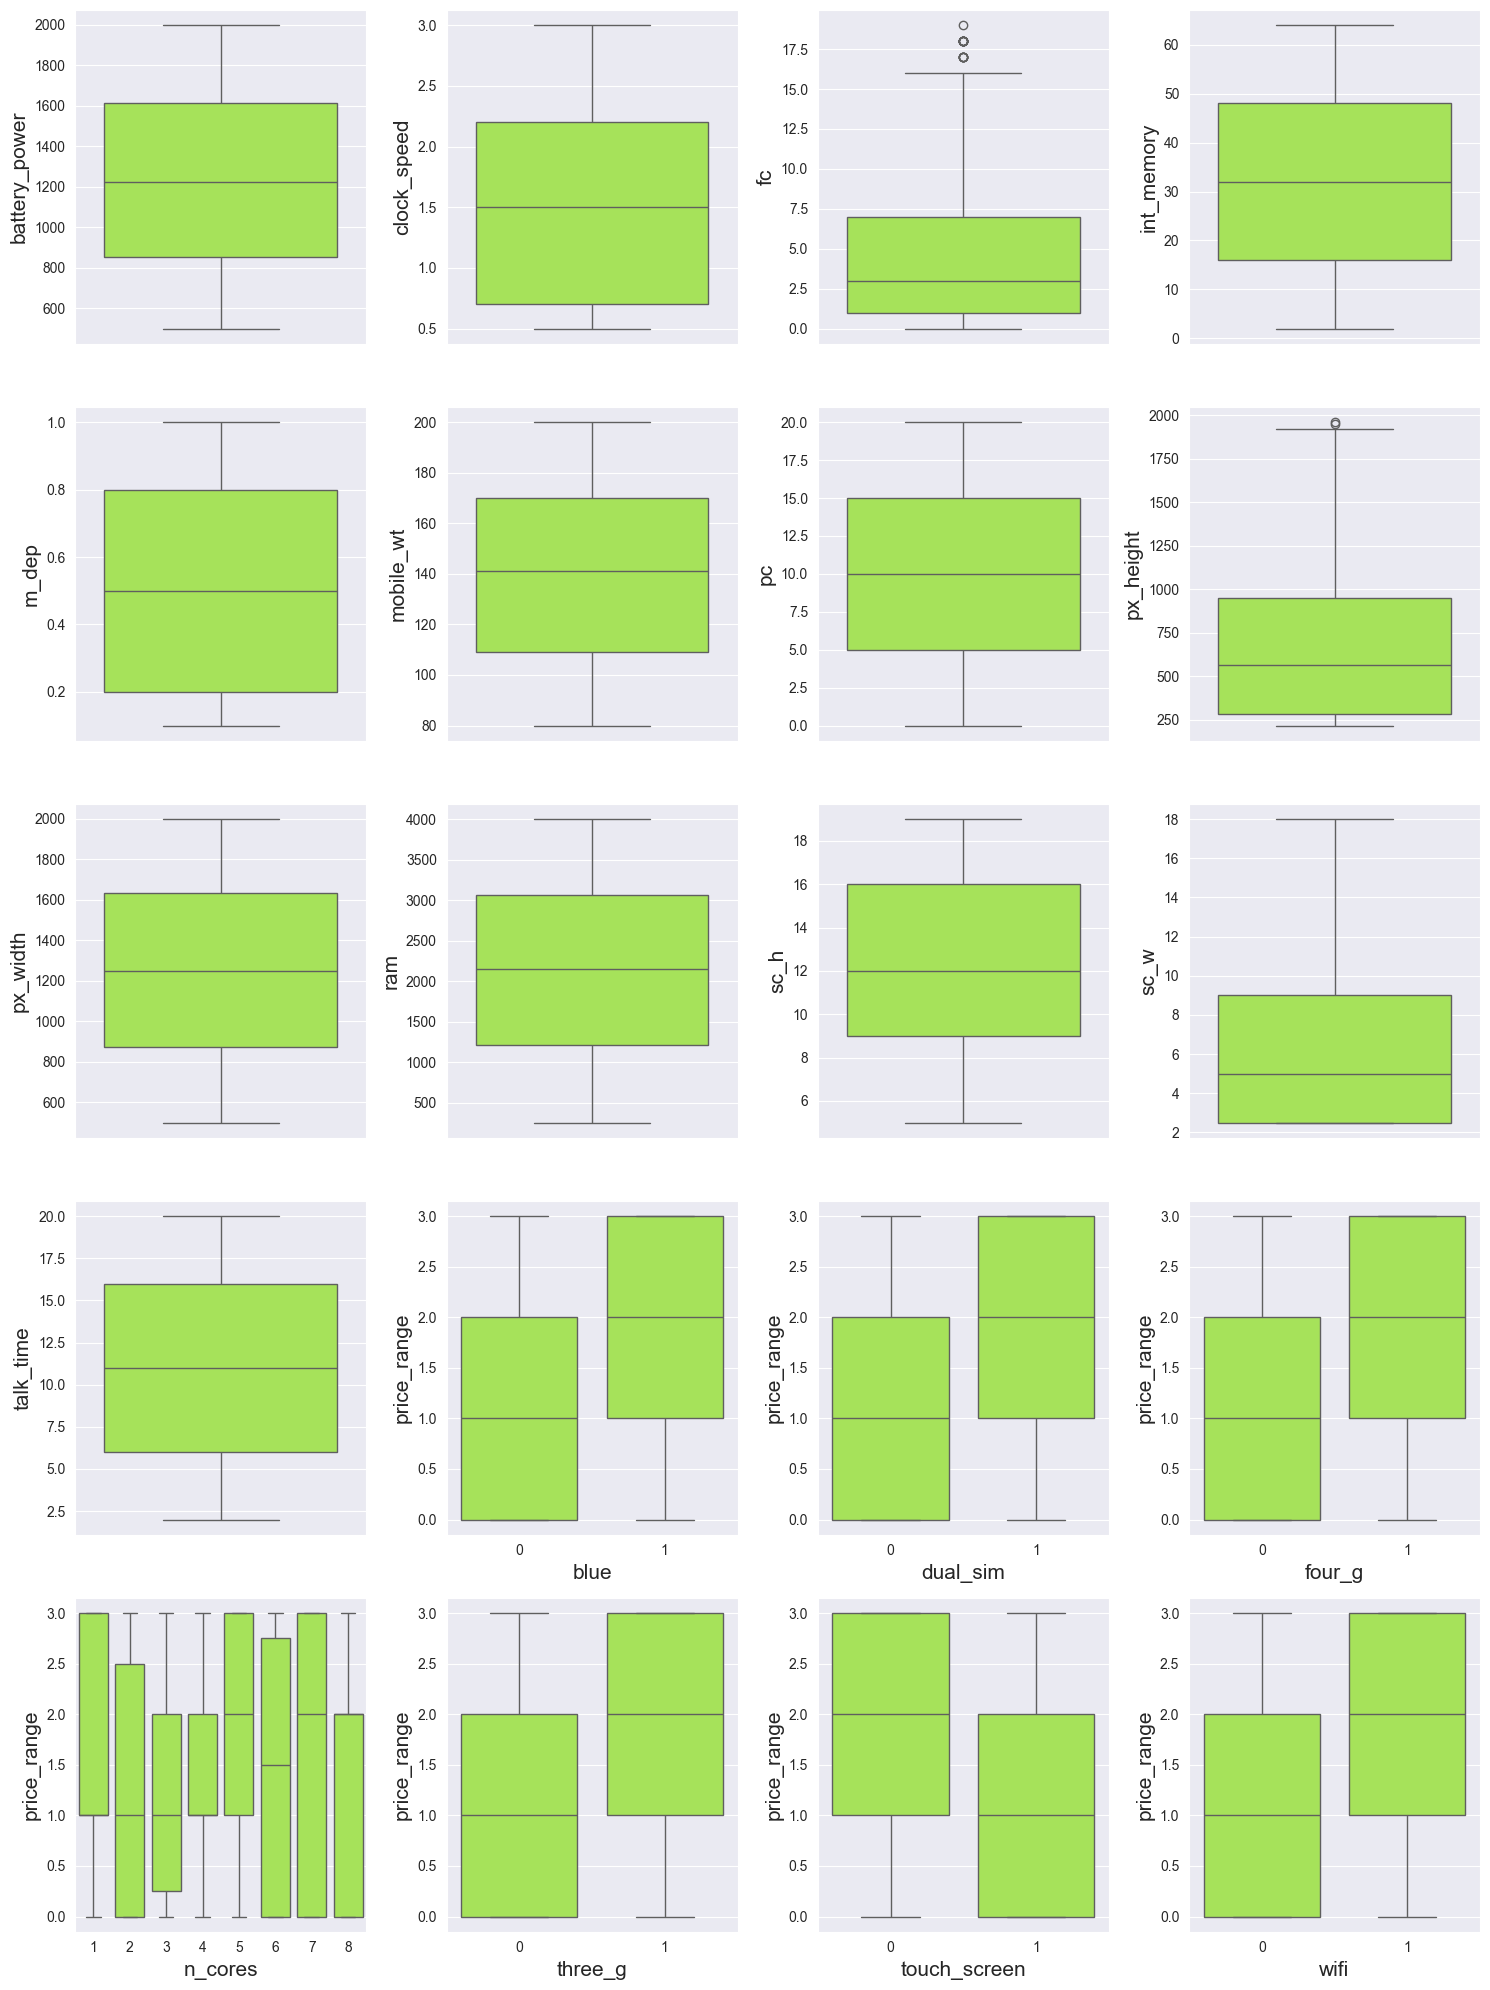

In [34]:
# outlier plots for both continues and categorical features:

sns.set_style('darkgrid')
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da','#af28aa','#8236ba','#0ff5a6','#83912c']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([num_columns,cat_columns])

fig, ax = plt.subplots(5, 4, figsize=(15,20),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<13:
        sns.boxplot(data=train, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=train, x=col, y='price_range', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

##### According to the definition of the function we had to check the outliers and after checking the box plot diagrams, we see that the number of outliers is very high. Therefore, if we want to remove them, the generalization of the model will be reduced. So we build and evaluate the model with these outliers. If I see that the obtained results are very bad, we will go back and make a decision about these outliers

<a id="import"></a>
## <p style="background:#2ab7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:50%; padding:30px">Step 3: Correlation</p>

Text(0.5, 1.0, 'Triangle')

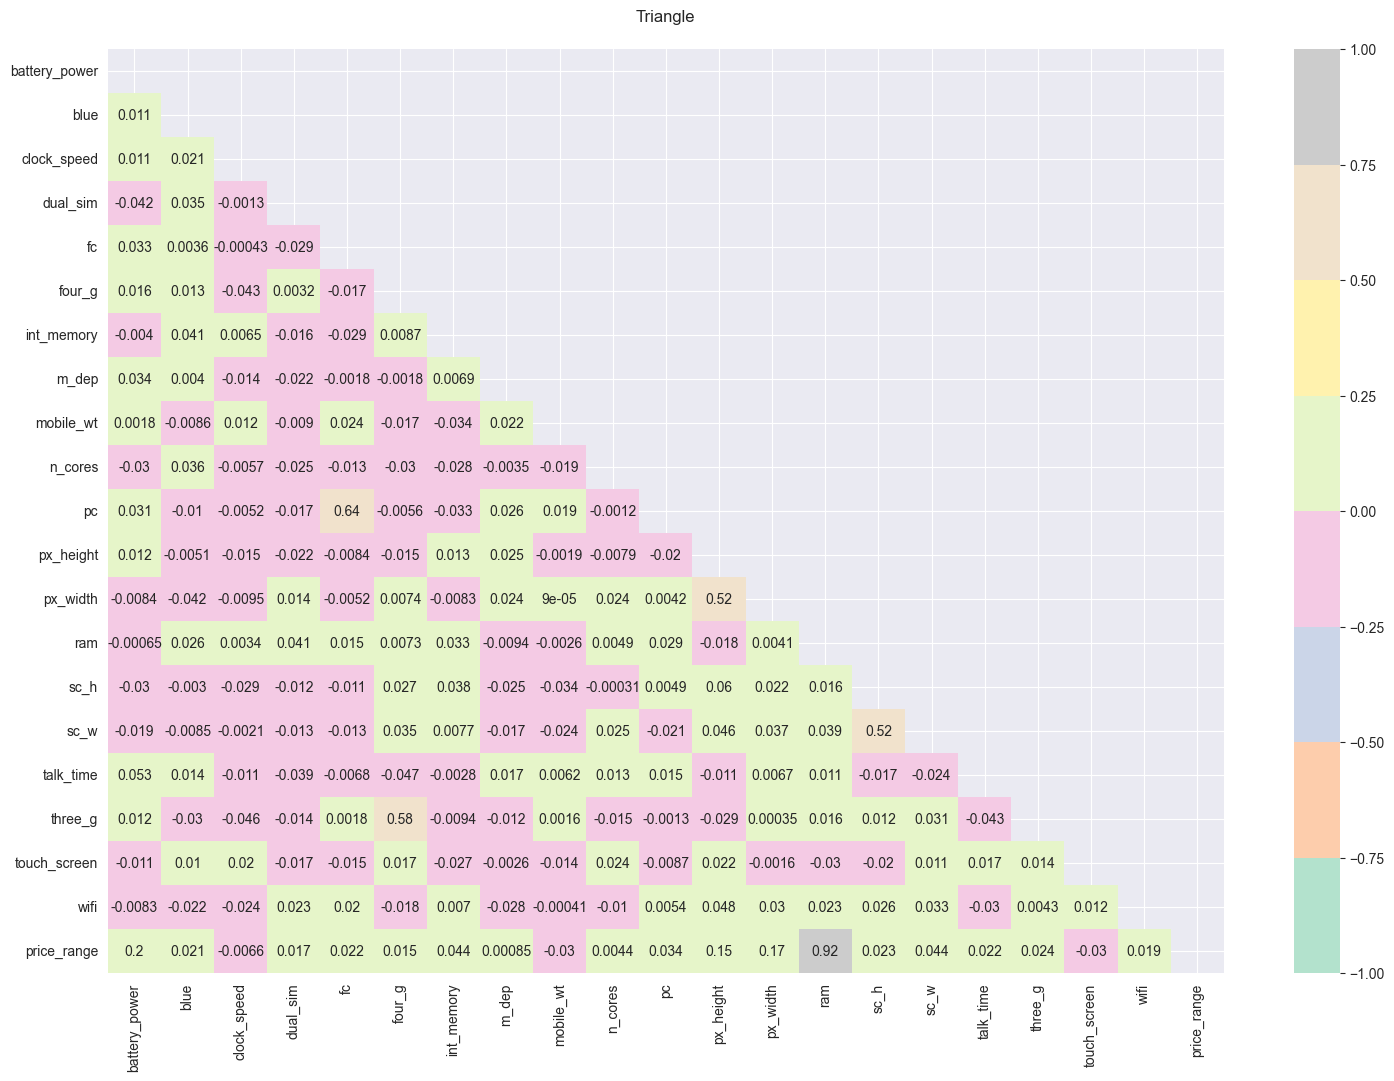

In [35]:
fig,ax=plt.subplots(1,1,figsize=(18,12))
mask=np.triu(np.ones_like(train.corr()))
heatmap=sns.heatmap(train.corr(),vmin=-1,vmax=1,mask=mask,cmap='Pastel2',annot=True)
heatmap.set_title('Triangle',fontdict={'fontsize':12},pad=20)

#### It can be seen from the above diagram that:
* __1- There is a very high correlation between RAM and target columns, so this column will definitely have a great impact on modeling.
*  __2- There is a relatively high correlation between the PC and FC columns, but not to the extent that we want to remove one of these two. Because you know that if the correlation between two independent columns is high, one of them must be removed for modeling. Because the issue of multicollinearity arises.
* __3- The case mentioned above is also established between the PXHeight and PXWidth columns.
But after making the model, as we discussed about the outliers, if the desired result does not come, we must go back and make a decision about these elements.
##### All these things are also true about the test dataset

<a id="import"></a>
# <p style="background:#2ab79f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase C: Learning the model & Evaluating the results</p>

#### At this stage, we have to build several types of models that are suitable for this dataset and finally evaluate them.

* __In this section, we go to the expression of models. In this project, we are going to officially use 3 decision tree models **DT**, random forest **RF** and **SVM**.
* __I present the construction of these models in 3 parts. 
* __In the first part, we present only 3 models without any hyperparameters and express the results. 
* __In the second part, we define a separate function for each of the models and express the results. Of course, in this section, we will set a series of important hyperparameters and see the results.



<a id="import"></a>
## <p style="background:#2ab7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:50%; padding:30px">Step 1: Simple Making Models</p>

In [36]:
Y=train['price_range']
X=train.drop('price_range',axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [38]:
def evaluate_model(models, X_train, X_test, y_train, y_test):
    compare_list = []
    for index,clf in models :
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        compare_list.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = index)))
    compare_list = pd.DataFrame(compare_list).T
    return compare_list

In [39]:
clf_DT=DecisionTreeClassifier(random_state=0)
clf_RF=RandomForestClassifier(random_state=0)
clf_SVC=SVC(random_state=0)
models = [('DTs',clf_DT), ('RF',clf_RF),('SVC',clf_SVC)]

In [40]:
def highlight(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [42]:
result_1 = evaluate_model(models, X_train, X_test, y_train, y_test)
result_1.style.apply(highlight,axis=1)

#### According to the results obtained from the above modeling, the SVM model has obtained the best result. Therefore, we choose this model as our main model for the next step, which is to predict the actual values. But we must pay attention to the fact that we may achieve better results by adjusting hyperparameters in other models, which makes us choose it as our main model. So, the SVM model has been selected so far.

### Accuracy (SVM): 0.95

<a id="import"></a>
## <p style="background:#2ab7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:50%; padding:30px">Step 2: Setting Some Hyperparameters for models</p>

<a id="import"></a>
## <p style="background:#86f7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:30%; padding:30px">Step 2_1: DTs</p>

In [43]:
def DT(X,Y,m_depth):
    compare_list_2 = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=DecisionTreeClassifier(max_depth=i,random_state=0)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        compare_list_2.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = i)))
    compare_list_2 = pd.DataFrame(compare_list_2).T
    return compare_list_2

In [44]:
compare_2 = DT( X, Y, np.arange(1,30))
print('Accuracy of DT:',compare_2.loc['Accuracy',].max())
print(compare_2.idxmax(axis=1))

Accuracy of DT: 0.8575
Precision       9
Recall          9
F1              9
Accuracy        9
Train_Score    14
Test_Score      9
dtype: int32


<a id="import"></a>
## <p style="background:#86f7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:30%; padding:30px">Step 2_2: RF</p>

In [45]:
def RF(X,Y,m_depth):
    compare_list_3 = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=RandomForestClassifier(max_depth=i,random_state=0)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        compare_list_3.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = i)))
    compare_list_3 = pd.DataFrame(compare_list_3).T
    return compare_list_3

In [46]:
compare_3 = RF( X, Y, np.arange(1,30))
print('Accuracy of RF:',compare_3.loc['Accuracy',].max())
print(compare_3.idxmax(axis=1))

Accuracy of RF: 0.8775
Precision      13
Recall         13
F1             13
Accuracy       13
Train_Score    12
Test_Score     13
dtype: int32


<a id="import"></a>
## <p style="background:#86f7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:30%; padding:30px">Step 2_3: SVM</p>

In [47]:
def SVM(X,Y):
    compare_list_4 = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    
    for i in range(1,150):
        for j in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
            clf=SVC(C=i,random_state=0,kernel='poly',degree=j)
            clf.fit(X_train,y_train)
            y_pred=clf.predict(X_test)
            compare_list_4.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = (i,j))))
    compare_list_4 = pd.DataFrame(compare_list_4).T
    return compare_list_4

In [48]:
compare_4 = SVM( X, Y)

In [49]:
compare_4.idxmax(axis=1) # for getting the index of maximum for each row

Precision       (42, 2)
Recall          (42, 2)
F1              (42, 2)
Accuracy        (42, 2)
Train_Score    (100, 7)
Test_Score      (42, 2)
dtype: object

* __So we should select **42** for **C** and **2** for **degree**

In [50]:
result_2=pd.DataFrame(index=["Precision","Recall","F1", "Accuracy",'Train_Score','Test_Score'],
            columns=['DT','RF','SVM'],
            data=[[compare_2.loc['Precision',].max(),compare_3.loc['Precision',].max(),compare_4.loc['Precision',].max()],
                  [compare_2.loc['Recall',].max(),compare_3.loc['Recall',].max(),compare_4.loc['Recall',].max()],
                  [compare_2.loc['F1',].max(),compare_3.loc['F1',].max(),compare_4.loc['F1',].max()],
                  [compare_2.loc['Accuracy',].max(),compare_3.loc['Accuracy',].max(),compare_4.loc['Accuracy',].max()],
                 [compare_2.loc['Train_Score',].max(),compare_3.loc['Train_Score',].max(),compare_4.loc['Train_Score',].max()],
                  [compare_2.loc['Test_Score',].max(),compare_3.loc['Test_Score',].max(),compare_4.loc['Test_Score',].max()]])
result_2.style.apply(highlight,axis=1)

### Accuracy (SVM): 0.983

#### The results got better

<a id="import"></a>
# <p style="background:#2ab79f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase D: Predictting real values</p>

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
clf2=SVC(C=42,random_state=0,kernel='poly',degree=2)
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9825

In [52]:
clf3=SVC()

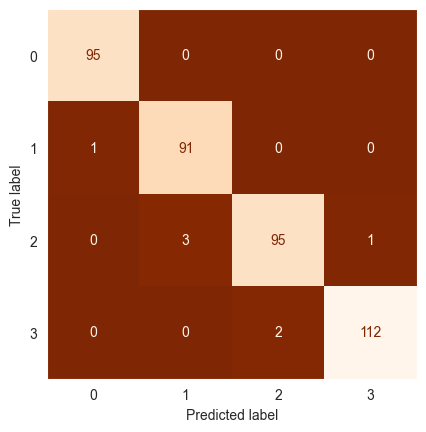

In [53]:
ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, colorbar=False, cmap='Oranges_r')
plt.grid(False)

* __The numbers on the main diagonal are correct and as we can see, they are much more than the numbers on the minor diagonals.

In [54]:
test['price_range']=clf2.predict(test);test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        226      1412  3476    12   7.0   
1      0.8        191        5  ...        746       857  3895     6   2.5   
2      0.9        186        3  ...       1270      1366  2396    17  10.0   
3      0.5         96        8  ...        295      1752  3893    10   2.5   
4      0.5        108        6  ...        749       810  1773    15   8.0   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
995    0.5        170        7  ...        644       913  2121    14   8.0   
996    0.9        186        4  ...       1152      1632  1933     8   2.5   
997    0.5         80        1  ...        477       825  1223     5   2.5   
998    0.4        171        2  ...        217       832  2509    15  11.0   
999    0.1        140        6  ...        457       608  2828     9   2.5   

     talk_time  three_g  touch_screen  wifi  price_range  
0            2        0             1     0            3  
1            7        1             0     0            3  
2           10        0             1     1            2  
3            7        1             1     0            3  
4            7        1             0     1            1  
..         ...      ...           ...   ...          ...  
995         15        1             1     0            2  
996         19        0             1     1            1  
997         14        1             0     0            0  
998          6        0             1     0            2  
999          3        1             0     1            2  

[1000 rows x 21 columns]

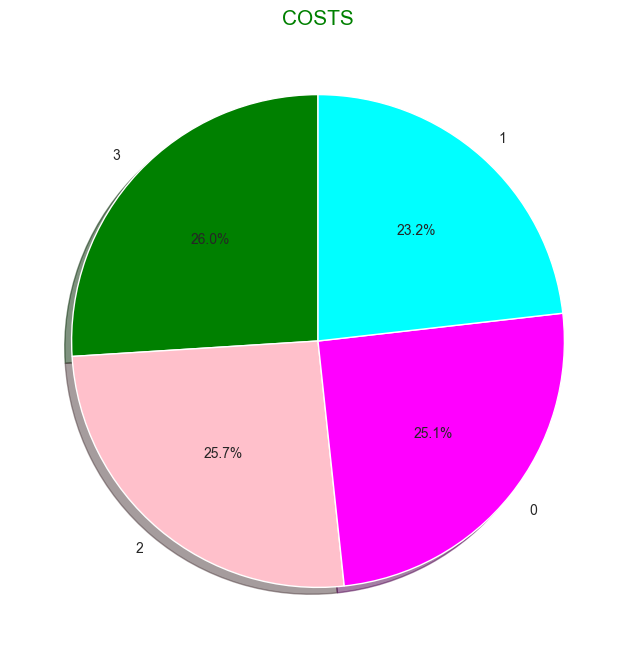

In [55]:
labels = test["price_range"].value_counts().index
sizes = test["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

### Well, interesting results were obtained. As can be seen, unlike the train dataset, where the groups were completely equal, this is not the case in the test dataset.
#### Most of the phones are in group 3. After that, class 2 phones are more than others. In the third category are class zero phones and at the end are class one phones